<center ><h1>Import Of Extracted Data</h1> </center>


In [1]:
import pandas as pd
df2=pd.read_csv('Arabic_project_data.csv')  
df2.drop(["Unnamed: 0"], axis=1, inplace=True)
df2

,text,Username,location,Timestamp,followers,label,categorie
0,RT @ahmedkotb127: نشترى\nالاثاث\nالمستعمل\nبال...,Hamza__5555,NaN,Tue Oct 13 03:08:21 +0000 2020,1028,4,economy
1,@ateez1023 مب صاحينن المسرح بيت ابوهم حرفيا 😭😭,Yambam2001,NaN,Sat Oct 10 22:25:00 +0000 2020,22,3,art
2,RT @bnouf13: بصرف النظر عن الخصومة السياسية بي...,tough1girl,Tabuk,Thu Oct 08 20:45:08 +0000 2020,299,1,politic
3,@DrAlghamdiMH الحقيقه هناك اسراف في المياه سوا...,faisal80792720,saudia,Tue Oct 13 03:03:02 +0000 2020,3162,4,economy
4,RT @F0cL12BUsxMp7iq: الله يخربيت الكوره ع الفي...,_amanymohamed74,Aswan,Fri Oct 09 20:47:37 +0000 2020,238,0,sport
...,...,...,...,...,...,...,...
37030,ماشفنا للحين شي 💔💔💔💔\nمر على هالخبر تقريبا سنه...,zezo321f,"الطائف, المملكة العربية السعودية",Sat Oct 10 19:10:12 +0000 2020,160,3,art
37031,RT @Shuoon_Royal: لجلالة السلطان هيثم بن طارق ...,Ask84728300,"Muscat, Oman",Sat Oct 10 20:12:00 +0000 2020,189,0,sport
37032,@ot_soror ايش نسوي..\nاسبوع الفيفا 🤷‍♂️,T_S_H_17,"Hamilton, Ontario",Sat Oct 10 20:20:13 +0000 2020,222,0,sport
37033,RT @0fj: عمالقة الفن الكويتي والخليجي\nالذين ق...,SalemHajjaf,Najran,Sat Oct 10 18:20:02 +0000 2020,3337,3,art



<center><h1>Cleaning Tweets </h1></center>
 


In [2]:
import string 
from string import digits
import re
def clean_tweets(text):
     
    remove_digits = str.maketrans('', '', digits)
    text =text.translate(remove_digits)
    text=text.translate(str.maketrans('', '', string.punctuation))#removing all ponctuations
 
    text = re.sub("@[_A-Za-z0-9]+","",text) #Removing mention
    text=re.sub("[^\w\s#@/:%.,_-]", "", text, flags=re.UNICODE)#REmove emoji
   
    text=re.sub(r'\s*[A-Za-z]+\b', '' , text)#remove no arabic word
    text=re.sub(r'#','',text)# removing hachtag
    text=re.sub(r'https?:\/\/\s+','',text)#remove the hyper link
    text = re.sub("\n","",text)
    text=re.sub(r'^[A-Za-z0-9.!?:؟]+'," ",text) ##Removing digits and punctuations
    text = re.sub("\n","",text)
    text = re.sub(u'\xa0','',text)
    text = re.sub(r'[\u064B\u064C\u064D\u064E\u064F\u0650\u0651\u0652]','',text)
    #text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("[ااا]+","ا",text)
    #text = re.sub("[ي","+[يييي",text)
    text = re.sub("[a-zA-Z]+","",text)
    text = re.sub("²", "", text)
    text = re.sub("[0-9]+","",text)

    text = re.sub("[ﷺöüçāīṣııšḥāḫםבםבḥāā]", "",text)
    text = re.sub("[헨리생일축하해요왕자어린]", "",text)
    text = re.sub(r'http', '',text)
    text=re.sub('[٠١٢٣٤٥٦٧٨٩]',"",text)
  
    text = re.sub('öü','',text)
    
    
    return text
df2['text']=df2['text'].apply(lambda x: clean_tweets(x))

In [12]:
df2['text'][5]

' لقاء عملاقين تجمعهما دهاء و حنكة السياسية والرؤية والتطوير بكم نفخر وفقكم الله وسدد خطاكم  محمدبنسلمان بندربن'


<center><h1>Word Frequencies</h1> </center>



In [ ]:
tweets = df2.text.str.cat(sep=' ')
tweets 

In [36]:
import nltk
from nltk.tokenize import word_tokenize
#function to split text into word
tokens = word_tokenize(tweets)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]

64084


['في',
 'من',
 'على',
 'و',
 'عن',
 'الله',
 'ما',
 'لا',
 'الرياضة',
 'الحكومة',
 'كل',
 'أن',
 'ان',
 'مع',
 'التجارة',
 'الدين',
 'القانون',
 'كرة',
 'هذا',
 'القدم']


<center><h1>Unigrams by Counts </h1> </center>


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_words(corpus, n=None):
    vect = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vect.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df2['text'], 10)
for word, count in common_words:
    
    print(word, count)
df_unigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_unigrams.head(10)
#df_unigrams.to_csv('unigrams.csv')

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=1, encoding=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


في 13404
من 13388
على 7541
عن 3632
الله 3205
ما 2847
لا 2824
الرياضة 2377
الحكومة 2330
كل 2218


,word,count
0,في,13404
1,من,13388
2,على,7541
3,عن,3632
4,الله,3205
5,ما,2847
6,لا,2824
7,الرياضة,2377
8,الحكومة,2330
9,كل,2218


<center><h1>Bigrams By counts </h1></center>


In [5]:
def top_n_words(corpus, n=None):
    vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vect.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df2['text'], 100)
#for word, count in common_words:
    
    #print(word, count)
df_bigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_bigrams.head(10)
#df_bigrams.to_csv('df_bigrams.csv')

,word,count
0,كرة القدم,1549
1,وزارة الرياضة,789
2,بك من,611
3,أعوذ بك,562
4,إني أعوذ,561
5,من الهم,553
6,اللهم إني,552
7,الهم والحزن,550
8,الدين وقهر,549
9,والحزن والعجز,546


In [6]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_bigrams.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='top 100 bigrams in text')


 <center><h1>Trigrams By Counts </h1></center>

In [7]:
def top_n_words(corpus, n=None):
    vect = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vect.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df2['text'],20)
#for word, count in common_words:
    
    #print(word, count)
df_trigram = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_trigram.head(20)
#df_trigram.to_excel('df_trigram.xlsx')

,word,count
0,أعوذ بك من,562
1,إني أعوذ بك,561
2,بك من الهم,552
3,من الهم والحزن,549
4,والحزن والعجز والكسل,546
5,الهم والحزن والعجز,545
6,والعجز والكسل والجبن,543
7,والكسل والجبن والبخل,542
8,اللهم إني أعوذ,533
9,الدين وقهر الرجال,521


In [8]:
df_trigram.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in text')

<center><h1>Transaltion in English </h1></center>

In [19]:
import copy
import googletrans
from googletrans import Translator

translatedList = []
for index, row in df2.iterrows():
    
    translator = Translator()
    newrow = copy.deepcopy(row)
    try:
        # translate the 'text' column
        translated = translator.translate(row['text'], dest='en')
        newrow['translated'] = translated.text
    except Exception as e:
        print(str(e))
        continue
    translatedList.append(newrow)
tweets_arab_trans = pd.DataFrame(translatedList)
tweets_arab_trans

,text,Username,location,Timestamp,followers,label,categorie,translated
0,ألف مليون مبروك لنادي أسوان وجمهوره الجميل الب...,Banoubi,"Cairo , EGYPT",Thu Oct 08 19:40:41 +0000 2020,12448,0,sport,A million congratulations to Aswan Club and it...
1,كان لدينا تحديدا في هذه الوزارة وزير يتحرك قب...,Nubi_j,👑 Kush Kingdom 👑🇸🇩🇻🇨,Thu Oct 08 20:21:38 +0000 2020,16894,1,politic,Specifically in this ministry we had a ministe...
2,اللهم صل وسلم وبارك على سيدنا محمد وعلى آله و...,Rawda_horra,NaN,Thu Oct 08 20:55:03 +0000 2020,2496,2,religion,"O God, bless and bless our master Muhammad, hi..."
3,كل شعب في العالم ينال الحكومة التي يستحقها تشرشل,ssccaa88,NaN,Thu Oct 08 20:46:33 +0000 2020,4664,1,politic,Every people in the world receives the governm...
4,كل التحية والتقدير للاعبي الزمالك علي المجهود...,Bahaa_ELaggan,مصر,Thu Oct 08 20:08:28 +0000 2020,538,0,sport,All greetings and appreciation to the players ...
...,...,...,...,...,...,...,...,...
4995,نشترىالاثاثالمستعملبالرياضبأفضلالاسعارغرفمطاب...,t22_0p,NaN,Thu Oct 08 18:35:09 +0000 2020,2596,4,economy,We buy used furniture in Riyadh at the best pr...
4996,و كما يقال القانون هو طب الآداب,omar_au,Kuwait,Thu Oct 08 19:47:45 +0000 2020,3071,1,politic,And as they say the law is the medicine of the...
4997,مخربي الناصريةيحركون مدينتهم لان جميل الشمريطل...,hasan_z313,NaN,Thu Oct 08 19:47:43 +0000 2020,286,1,politic,"The saboteurs of Nasiriyah, moving their city,..."
4998,مسموح اختراق ال وتبادل الموسيقى,NourGadll,NaN,Thu Oct 08 18:08:13 +0000 2020,651,3,art,Hacking and sharing music is allowed



<center><h1>Stop Words </h1></center>

In [13]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('arabic')
#words = set(nltk.corpus.words.words())
arab_stopwords = set(nltk.corpus.stopwords.words("arabic"))
arab_stopwords

{'آه',
 'آها',
 'آي',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'أم',
 'أما',
 'أن',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنى',
 'أو',
 'أولئك',
 'أولاء',
 'أوه',
 'أي',
 'أين',
 'أينما',
 'أيها',
 'إذ',
 'إذا',
 'إذما',
 'إذن',
 'إلا',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'إما',
 'إن',
 'إنا',
 'إنما',
 'إنه',
 'إي',
 'إيه',
 'التي',
 'الذي',
 'الذين',
 'اللائي',
 'اللاتي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بيد',
 'بين',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل',
 'على',
 'عليك',
 'عليه',
 'عم

In [14]:
arab_stopwords = r'\b(?:{})\b'.format('|'.join(arab_stopwords))
arab_stopwords

'\\b(?:فيما|بهم|بعد|نحن|آي|به|اللتيا|أنت|ماذا|هيا|منذ|ذوا|ومن|حيثما|ذينك|هذين|ليسا|أنتم|سوى|ممن|كذا|ذين|قد|مما|ولو|أما|بهما|عن|هذي|هيت|إنا|كم|اللتين|ما|أف|لي|ذانك|أنتما|لعل|ذه|أنتن|والذين|منها|لك|فيها|لما|فمن|كيت|متى|هلا|في|ذا|هاك|هي|لهم|بمن|أنى|ليس|أين|لنا|ذلك|كل|اللواتي|إنما|فيم|كي|اللاتي|هذه|هناك|ولكن|عل|ذواتي|لست|إليكما|ليست|وما|ثم|إذ|لا|ها|لهما|وإن|ذات|كما|بها|عما|أنا|هنا|لستن|ذو|إما|بكم|بنا|لكنما|عند|ته|بخ|ذان|كذلك|كيف|أكثر|هل|التي|إلى|الذين|وإذ|كلتا|إذا|بين|ألا|هنالك|نعم|يا|الذي|إن|آه|بماذا|كليهما|لستم|بيد|ريث|كأنما|أن|بلى|آها|إذما|حتى|لاسيما|هاهنا|اللائي|إليكم|أي|ولا|وإذا|بكن|هاته|لسن|هاتين|هذان|فإن|تلكما|كأين|بعض|على|إيه|لوما|أيها|لكيلا|حاشا|كلاهما|إذن|حيث|شتان|له|منه|هكذا|بك|لم|ذلكم|هم|أقل|ليستا|ثمة|لكي|بما|لسنا|هما|أم|هذا|هو|كلا|لستما|ذلكما|عسى|مذ|والذي|نحو|مع|وهو|غير|هاتي|فيه|بي|اللذين|فإذا|أو|إنه|عليه|أوه|لكما|من|لكن|مه|فلا|لها|سوف|تلكم|إلا|بل|كأي|لدى|لن|ذواتا|بكما|إليكن|ذي|لولا|هاتان|عدا|هؤلاء|كأن|هيهات|تلك|ذاك|حبذا|هن|لئن|إليك|اللتان|بهن|حين|لو|تي|عليك|بس|ذلكن|كلما|كليكم

In [19]:
df2['clean_tweets']=df2['text'].str.replace(arab_stopwords, '')
df2['clean_tweets'].tail(10)

37025     عطرو  أنفاسكم بالصلاة والسلام  محمد رسول الله...
37026      وكيل  ولي  مرشد  عذر لدولة ترفض تطبيق القانو...
37027     رسالة واضحة وصريحة وزير الصحة الحالي  لديه ال...
37028                                 الموسيقى أصبحت باهتة
37029     يووه مرره قدييم  شكل القصه حلوة  انه رسم قديم...
37030     ماشفنا للحين شي مر  هالخبر تقريبا سنه سينمالطايف
37031     لجلالة السلطان هيثم بن طارق المعظم اهتمامات و...
37032                                ايش نسوياسبوع الفيفا 
37033     عمالقة الفن الكويتي والخليجيالذين قدموا الفن ...
37034                                        اخباركم بايتة
Name: clean_tweets, dtype: object

<center><h1>Tokenize Word and Sentence </h1></center>

In [23]:
sentences = df2.iloc[2]
sentences['text']
print (nltk.sent_tokenize(sentences['text']))
print('*********************************')
print (nltk.word_tokenize(sentences['text']))

[' اللهم صل وسلم وبارك على سيدنا محمد وعلى آله وصحبه أجمعين ومن تبعهم بإحسان إلى يوم الدين']
*********************************
['اللهم', 'صل', 'وسلم', 'وبارك', 'على', 'سيدنا', 'محمد', 'وعلى', 'آله', 'وصحبه', 'أجمعين', 'ومن', 'تبعهم', 'بإحسان', 'إلى', 'يوم', 'الدين']



 <center><h1>Stemmer</h1></center>


In [24]:
#Tashaphyne is an Arabic light stemmer and segmentor. 
from tashaphyne.stemming import ArabicLightStemmer
ArListem = ArabicLightStemmer()

 # stemming word
stem = ArListem.light_stem(sentences['text'])
 # extract stem
print (ArListem.get_stem())
print('\n')
 # extract root
print (ArListem.get_root())
print('\n')
print (ArListem.get_prefix())
print('\n')
print (ArListem.get_suffix())

 اللهم صل وسلم وبارك على سيدنا محمد وعلى آله وصحبه أجمعين ومن تبعهم بإحسان إلى يوم الدين


 للهم صل سلم برك علي سدن محمد علي ءاله صحبه ءجمعن من تبعهم بءحسن ءلي م لدن





ن


In [25]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
for a in word_tokenize(sentences['text']):

    print(st.stem(a))

لهم
صل
سلم
وبر
على
سيد
حمد
على
اله
صحب
جمع
ومن
تبع
إحس
الى
يوم
دين



<center><h1>Bag Of Word</h1></center>

In [20]:

from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(df2['clean_tweets'])

CountVectorizer()

In [ ]:

#count_vector.get_feature_names()

In [52]:
doc_array = count_vector.transform(df2['clean_tweets'][:5000]).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
frequency_matrix = pd.DataFrame(doc_array,index=df2['clean_tweets'][:5000],columns=count_vector.get_feature_names())
frequency_matrix.head()

,āā,ءامنوا,ءاناي,ءلك,ءيقال,آآآه,آب,آباؤنا,آبائه,آتاه,...,ṣقال,ㅤㅤ,ﷲﷻإن,ﺃﺷﺘﺎﻕ,ﺃﻧﺘﻈﺮﻙ,ﺇﻧا,ﺍﻷﻫﻢ,ﺫﻟﻚ,ﻟكي,ﻣﻦ
clean_tweets,,,,,,,,,,,,,,,,,,,,,
حبر ورق الدليل الأخطاء الفادحة تحدث غالبية الإدارات ولم يتم محاسبتها للأسف يتم الاستغناء اللاعبين المميزين,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
يوجد دمج واضح السياسة والسلطة السياسة مفهوم يجب يتحلى ويتقنها جميع الناس وليس احتكارا لمن السل,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
الدول الممنوعة دخول الكويت بسبب انتشار فايروس كورونا دولة مصر صدر القرار وهذه الجالية تذهب دبي,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
الموسيقى اللي قبل مايقول عمرو حسن خلينا اصحاب تمثلني,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
الأفلام تخلينا نضحك ونبكي ونتحمس مايوصل الحال بأن تكون سبب فقدان المشاهد لحياته تحت التغريدة راح احط مجموعة,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 <center><h1>TF IDF </h1></center>

In [11]:

# converts the words to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df2['clean_tweets'][:5000]).toarray()
df_tf = pd.DataFrame(X, columns=tfidf_vectorizer.get_feature_names())
df_tf.head(5)

,آب,آتاه,آثار,آحادشرك,آخر,آخسر,آدم,آدمي,آسر,آسفكلمات,...,ڪما,یا,ㅤㅤ,ﺃﺷﺘﺎﻕ,ﺃﻧﺘﻈﺮﻙ,ﺇﻧا,ﺍﻷﻫﻢ,ﺫﻟﻚ,ﻟكي,ﻣﻦ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



<center><h1>Word Cloud </h1></center>

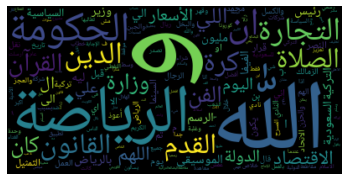

In [53]:
text=df2['clean_tweets']

text = ' '.join([str(elem) for elem in text])
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(500)}

font_file = './NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

  <center><h1>Count Vectorizer </h1></center>



In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df2['clean_tweets'])

In [ ]:
#print(vectorizer.get_feature_names())

<center><h1>Support Vector Machine (SVM)</h1></center>

In [23]:
from sklearn.model_selection import train_test_split
y=df2['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [25]:
y_prediction=svc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_prediction)
print(cm)
print(classification_report(y_test,y_prediction))

[[1316   42   12   98    0]
 [  23 1376   23   75   10]
 [   2   48 1329   49    1]
 [   7   33   31 1446    3]
 [   1   85   12   53 1332]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.93      1468
           1       0.87      0.91      0.89      1507
           2       0.94      0.93      0.94      1429
           3       0.84      0.95      0.89      1520
           4       0.99      0.90      0.94      1483

    accuracy                           0.92      7407
   macro avg       0.92      0.92      0.92      7407
weighted avg       0.92      0.92      0.92      7407



 <center><h1>Saving and Using The Model SVM </h1> </center>

<h2>Support Vector Machine  with Accuracy 92 %</h2>

In [26]:
from joblib import dump, load
import pickle
pickle.dump(svc, open('svm.pkl','wb'))
model_arab_svm = pickle.load(open('svm.pkl','rb'))

In [27]:
import numpy as np 
model_arab_svm = load('svm.pkl') 
message='يعد أساس الإسلام هو الإيمان بالإله الواحد'

data=[message]
vect = vectorizer.transform(data)
my_prediction = model_arab_svm.predict(vect)
if (my_prediction[0]==0):
    print('Sportif')
elif ((my_prediction[0]==1)):
    print('Politic')
else:
    print('Religion')

Religion



<center><h1>Naive Bayes (NB)</h1></center>


In [28]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)
y_predict=NB_classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
print(cm)
print('********************')
print(classification_report(y_test,y_predict))

[[1358   33   20   45   12]
 [  38 1362   31   51   25]
 [  12   64 1304   42    7]
 [  19   34   28 1429   10]
 [  19   91   18   51 1304]]
********************
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1468
           1       0.86      0.90      0.88      1507
           2       0.93      0.91      0.92      1429
           3       0.88      0.94      0.91      1520
           4       0.96      0.88      0.92      1483

    accuracy                           0.91      7407
   macro avg       0.91      0.91      0.91      7407
weighted avg       0.91      0.91      0.91      7407



<center><h1>Saving and Using The Model Naive Bayes </h1></center>

<h2>Naive Bayes with accuracy 91% </h2>

In [58]:
from joblib import dump, load
import pickle
pickle.dump(NB_classifier, open('nb.pkl','wb'))
model_arab_nb = pickle.load(open('nb.pkl','rb'))

In [59]:
import numpy as np 
model_arab_nb = load('nb.pkl') 
message='الحمد لله على نعمة الإسلام'
data=[message]
vect = vectorizer.transform(data)
my_prediction = model_arab_nb.predict(vect)
if (my_prediction[0]==0):
    print('Sportif')
elif ((my_prediction[0]==1)):
    print('Politic')
elif ((my_prediction[0]==2)):
    print('Religion')
elif ((my_prediction[0]==3)):
    print('Art')
else:
    print('Economy')
    


Religion


In [60]:
import numpy as np 
model_arab_nb = load('nb.pkl') 
message='في السياسة ليس هناك عدو دائم او صديق دائم هناك مصالح دائمة'
data=[message]
vect = vectorizer.transform(data)
my_prediction = model_arab_nb.predict(vect)
if (my_prediction[0]==0):
    print('Sportif')
elif ((my_prediction[0]==1)):
    print('Politic')
elif ((my_prediction[0]==2)):
    print('Religion')
elif ((my_prediction[0]==3)):
    print('Art')
else:
    print('Economy')

Politic


In [61]:
import numpy as np 
model_arab_nb = load('nb.pkl') 
message='ريال مدريد اقوى فريق في العالم'
data=[message]
vect = vectorizer.transform(data)
my_prediction = model_arab_nb.predict(vect)
if (my_prediction[0]==0):
    print('Sportif')
elif ((my_prediction[0]==1)):
    print('Politic')
elif ((my_prediction[0]==2)):
    print('Religion')
elif ((my_prediction[0]==3)):
    print('Art')
else:
    print('Economy')

Sportif


In [62]:
import numpy as np 
model_arab_nb = load('nb.pkl') 
message='يبدأ الفن حيث تنتهى الرغبة'
data=[message]
vect = vectorizer.transform(data)
my_prediction = model_arab_nb.predict(vect)
if (my_prediction[0]==0):
    print('Sportif')
elif ((my_prediction[0]==1)):
    print('Politic')
elif ((my_prediction[0]==2)):
    print('Religion')
elif ((my_prediction[0]==3)):
    print('Art')
else:
    print('Economy')

Art


In [63]:
import numpy as np 
model_arab_nb = load('nb.pkl') 
message='الأماني رءوس مال المفاليس'
data=[message]
vect = vectorizer.transform(data)
my_prediction = model_arab_nb.predict(vect)
if (my_prediction[0]==0):
    print('Sportif')
elif ((my_prediction[0]==1)):
    print('Politic')
elif ((my_prediction[0]==2)):
    print('Religion')
elif ((my_prediction[0]==3)):
    print('Art')
else:
    print('Economy')


Economy



 <center><h1> Long Short Term Memory (LSTM)</h1></center>

<h1>Data Preparation and Pad text Data</h1>

In [31]:
X=df2['clean_tweets'].values
y=df2['label'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print('Training Data:', X_train.shape[0])
print('Test Data:', X_test.shape[0])

Training Data: 29628
Test Data: 7407


In [33]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text,sequence
max_features=10000
#which is set to 10000. This is because when you convert words to numbers using the bag of words approach, 
#all the unique words in all the documents are converted into features. 
#All the documents can contain tens of thousands of unique words.
#But the words that have a very low frequency of occurrence are unusually not a good parameter for classifying documents. 
#Therefore we set the max_features parameter to 10000, which means that we want to use 10000 most occurring words as features for training our classifier.
max_text_length=20


x_tokenizer=Tokenizer(max_features)

In [34]:
x_tokenizer.fit_on_texts(X)
word_index = x_tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 63892 unique tokens.


In [69]:
import collections
print('Top 5 most common words are:', collections.Counter(x_tokenizer.word_counts).most_common(5))

Top 5 most common words are: [('و', 6311), ('الله', 3205), ('الرياضة', 2377), ('الحكومة', 2330), ('ان', 2080)]


In [35]:

#text to numbers
#return each text by sequence of integers ,each integer be the index of token in dictionary
x_train=x_tokenizer.texts_to_sequences(X_train) 
x_train_val=sequence.pad_sequences(x_train,padding='post',maxlen=max_text_length)
x_test=x_tokenizer.texts_to_sequences(X_test) 
x_test_val=sequence.pad_sequences(x_test,padding='post',maxlen=max_text_length)

In [107]:
X_train[6]

'يارب هب  قلبا  يتكاسل  صلاتك اللهم ايقظني  احب الاوقات اليك ربي اجعلني مقيم الصلاة  ذريتي'

In [108]:
x_train_val[32]

array([9986, 2209,   18, 5219, 4237,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [36]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM,Embedding
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D ,Dropout
maxlen=max_text_length
embedding_dim=100
model=Sequential()
model.add(layers.Embedding(input_dim=max_features,
         output_dim=embedding_dim,
         input_length=maxlen))

model.add(layers.LSTM(64))
model.add(layers.Dropout(0.8))


model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 100)           1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 1,042,565
Trainable params: 1,042,565
Non-trainable params: 0
_________________________________________________________________


In [110]:
history=model.fit(x_train_val,y_train, epochs=3, batch_size=32, verbose=1, validation_split=0.2)

Train on 16944 samples, validate on 4236 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/3
16944/16944 [==============================] - 31s 2ms/sample - loss: 0.7512 - acc: 0.7022 - val_loss: 0.2928 - val_acc: 0.8999
Epoch 2/3
16944/16944 [==============================] - 26s 2ms/sample - loss: 0.2573 - acc: 0.9226 - val_loss: 0.2623 - val_acc: 0.9115
Epoch 3/3
16944/16944 [==============================] - 28s 2ms/sample - loss: 0.1702 - acc: 0.9525 - val_loss: 0.2821 - val_acc: 0.9124


In [111]:
scores,accuracy = model.evaluate(x_test_val, y_test)
print('Score:',scores)
print('Accuracy:',accuracy)

5296/5296 [==============================] - 1s 179us/sample - loss: 0.2743 - acc: 0.9186
Score: 0.2742508703123868
Accuracy: 0.91861784


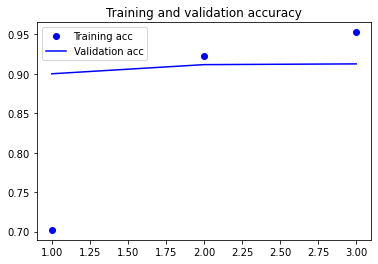

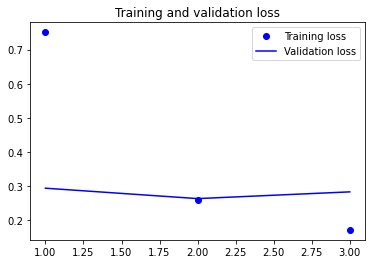

In [117]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<center><h1> Saving and Using The Model LSTM</h1></center>

<h2> Long Short Term Memory with accuracy 91% </h2>

In [43]:
text = ["المنتخب المغربي يفوز على نضيره السنغالي"]
seq = x_tokenizer.texts_to_sequences(text)
padded = sequence.pad_sequences(seq,padding='post',maxlen=max_text_length)
pred = model.predict(padded)
labels = ['Sport', 'Politic', 'Religion','Art','Economy']
print( labels[np.argmax(pred)])

Sport


In [54]:
text = ["بيكاسو مبدع في لوحاته"]
seq = x_tokenizer.texts_to_sequences(text)
padded = sequence.pad_sequences(seq,padding='post',maxlen=max_text_length)
pred = model.predict(padded)
labels = ['Sport', 'Politic', 'Religion','Art','Economy']
print( labels[np.argmax(pred)])

Art


In [58]:
text = ["في السياسة ليس هناك عدو دائم او صديق دائم هناك مصالح دائمة"]
seq = x_tokenizer.texts_to_sequences(text)
padded = sequence.pad_sequences(seq,padding='post',maxlen=max_text_length)
pred = model.predict(padded)
labels = ['Sport', 'Politic', 'Religion','Art','Economy']
print( labels[np.argmax(pred)])


Politic


In [60]:
from keras.models import load_model
model.save('ltsm.h5') 


<h3><U>REALIZED BY:</U> </h3> <H5> ELHARCHAOUI ZAKARIA  </H5>